# 機器學習
## Boston House Pricing

![Rose & Prairie Gentian](https://creativepark.canon/images/contents/CNT-0026456/CNT-0026456_detail-01_s@2x.jpg)
[CANON Home and Living](https://creativepark.canon/en/categories/CAT-ST01-0113/index.html)

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
import pandas as pd
# 取出"data" array，加入欄位名稱"feature_names"
df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
# 將iris["target"]欄位加入df dataframe
df["target"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1)

In [56]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

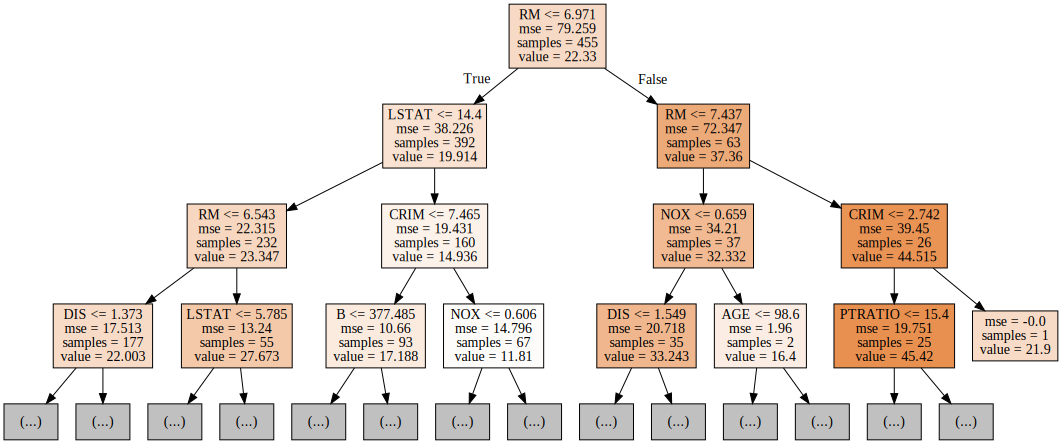

In [57]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,feature_names=boston["feature_names"], filled=True, max_depth=3)
# 這裡的 max_depth=3 表示只秀出3層
graph = graphviz.Source(g)
# mse = mean square error
# mae = mean absolute error
graph

In [58]:
from sklearn.metrics import r2_score

pre = reg.predict(x_test)
print(pre)
print("預測結果：",list(pre))
print("真正結果：",list(y_test))
r2_score(y_test, pre)

[21.64712644 21.64712644 42.63333333 30.09130435 10.87321429 32.75
 21.64712644 18.5537037  25.934375   18.5537037  18.5537037  21.64712644
 47.77142857 25.934375   21.64712644 42.42727273 18.5537037  21.64712644
 21.64712644 21.64712644 21.64712644 21.64712644 21.64712644 30.09130435
 10.87321429 10.87321429 18.5537037  18.5537037  21.64712644 21.64712644
 47.77142857 32.75       21.64712644 21.64712644 15.2974359  21.64712644
 30.09130435 18.5537037  32.75       30.09130435 18.5537037  18.5537037
 42.42727273 21.64712644 10.87321429 18.5537037  21.64712644 18.5537037
 21.64712644 21.64712644 21.64712644]
預測結果： [21.647126436781605, 21.647126436781605, 42.63333333333333, 30.09130434782609, 10.873214285714283, 32.75000000000001, 21.647126436781605, 18.553703703703704, 25.934375000000003, 18.553703703703704, 18.553703703703704, 21.647126436781605, 47.771428571428565, 25.934375000000003, 21.647126436781605, 42.42727272727273, 18.553703703703704, 21.647126436781605, 21.647126436781605, 21.

0.8158122994093245